In [1]:
2+3

5

In [3]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START,END

In [4]:
class AgentState(TypedDict):
    num1:int
    num2:int
    oper:str
    final:int

In [6]:
def adder(state:AgentState)->AgentState:
    """This node adds to numbers"""

    state['final'] = state['num1']+state['num2']
    return state

def subtract(state:AgentState)->AgentState:
    """This node subtracts to numbers"""

    state['final'] = state['num1']-state['num2']
    return state

def decide_next_node(state:AgentState)->AgentState:
    """This node will select the enxt node of the graph"""

    if state["oper"] == "+":
        return "additional_operator"
    else:
        return "sunbtraction_operator"

In [7]:
graph  = StateGraph(AgentState)

graph.add_node("adder",adder)
graph.add_node("subtract",subtract)
graph.add_node("router", lambda  state:state) # pass through function
graph.add_edge(START,"router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "additional_operator":"adder",
        "sunbtraction_operator":"subtract"
    }
)


graph.add_edge("adder",END)
graph.add_edge("subtract",END)


app = graph.compile()


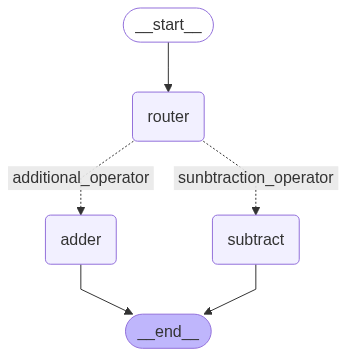

In [8]:
from IPython.display import display,Image

display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
res = app.invoke({"num1":3,"num2":4,"oper":"+"})

In [14]:
res['final']

7

In [16]:
# different way of invoking

data = AgentState(num1=4,num2=5,oper="-")
res = app.invoke(data)
res['final']

-1